In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import matplotlib.cm as cm

Own function for computing KNN with k=1

In [2]:
def my_knn(X_train, y_train, X_test):
  y_pred = np.array([[]])
  for te_obs in X_test:
    min_dist=1e20
    for i, (tr_obs, tr_class) in enumerate(zip(X_train, y_train)):
      dist = np.sqrt(((te_obs-tr_obs)**2).sum(axis=0))
      if dist < min_dist:
        min_dist = dist
        min_obs = tr_obs
        min_class = tr_class
        min_i = i
    y_pred = np.append(y_pred, min_class)
  return y_pred

In [3]:
people_3 = fetch_lfw_people(min_faces_per_person = 20, resize=0.7)

In [4]:
print("people.images.shape: {}".format(people_3.images.shape))
print("Number of classes: {}".format(len(people_3.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [5]:
mask_3 = np.zeros(people_3.target.shape, dtype=bool)
for target in np.unique(people_3.target):
  mask_3[np.where(people_3.target == target)[0][:50]] = 1
X_people_3 = people_3.data[mask_3]
y_people_3 = people_3.target[mask_3]
X_people_3 = X_people_3/255

In [6]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_people_3, y_people_3, stratify=y_people_3, random_state=0)

Computes mean and standard deviation of X_train data

In [7]:
X_train_mean_3 = np.mean(X_train_3, axis=0)
X_train_std_3 = np.std(X_train_3, axis=0, ddof=1)

Standardizes X_train

In [8]:
X_train_3 = (X_train_3 - X_train_mean_3)/X_train_std_3

Computes covariance matrix

In [9]:
cov_matrix_3 = (X_train_3.T @ X_train_3) / (X_train_3.shape[0]-1)
cov_matrix_3

array([[ 1.0000005 ,  0.9797677 ,  0.9269784 , ..., -0.00588572,
        -0.01245558, -0.0114214 ],
       [ 0.9797677 ,  1.        ,  0.97675896, ..., -0.01238488,
        -0.01823447, -0.0184888 ],
       [ 0.9269784 ,  0.97675896,  1.0000001 , ..., -0.02072199,
        -0.02824603, -0.03127804],
       ...,
       [-0.00588572, -0.01238488, -0.02072199, ...,  1.0000015 ,
         0.96498877,  0.89218   ],
       [-0.01245558, -0.01823447, -0.02824603, ...,  0.96498877,
         1.0000002 ,  0.97113836],
       [-0.0114214 , -0.0184888 , -0.03127804, ...,  0.89218   ,
         0.97113836,  0.9999998 ]], dtype=float32)

Computes eigenvalues and eigenvectors for covariance matrix

In [10]:
val_3, vec_3 = np.linalg.eig(cov_matrix_3)

Simultaneously sorts largest eigenvalues and the corresponding eigenvectors

In [11]:
index_3 = val_3.argsort()[::-1]
eigval_3 = val_3[index_3]
eigvec_3 = vec_3[:,index_3]

Takes the eigenvectors associated with the 2 highest eigenvalues

In [12]:
new_base_3 = eigvec_3[:,:2]
new_base_3

array([[-0.00169966,  0.00963886],
       [-0.00210216,  0.0094994 ],
       [-0.00257795,  0.00977047],
       ...,
       [-0.00206816, -0.00929776],
       [-0.00188274, -0.00893104],
       [-0.00156391, -0.00847013]], dtype=float32)

In [13]:
pca_3 = PCA(n_components=2)
new_data_pca_3 = pca_3.fit_transform(X_train_3)

Computes scikit learn PCA to verify our results

In [14]:
pca_3.components_.T

array([[-0.00169968,  0.00963888],
       [-0.00210216,  0.00949943],
       [-0.00257795,  0.00977047],
       ...,
       [-0.00206817, -0.00929776],
       [-0.00188274, -0.00893104],
       [-0.00156391, -0.00847013]], dtype=float32)

Results are validated

Projects the data onto the new base

In [15]:
new_X_train_3 = X_train_3 @ new_base_3

In [16]:
new_X_train_3

array([[-40.511986 , -27.002373 ],
       [ 15.911039 ,  -3.6086886],
       [ -2.9743266,  26.913984 ],
       ...,
       [ -3.4587276,  37.06751  ],
       [  4.2845216,   9.796624 ],
       [ -5.582073 ,  25.184122 ]], dtype=float32)

Returns the indexes of the max values of PC1 and PC2

In [17]:
new_X_train_3.argmax(axis=0)

array([1014,  217])

In [18]:
new_X_train_3[1014,:]

array([134.1411   ,  -7.8123307], dtype=float32)

In [19]:
new_X_train_3[217,:]

array([39.060066, 89.1957  ], dtype=float32)

Returns the indexes of the min values on PC1 and PC2

In [20]:
new_X_train_3.argmin(axis=0)

array([ 778, 1533])

In [21]:
new_X_train_3[778,:]

array([-110.21942 ,  -13.091218], dtype=float32)

In [22]:
new_X_train_3[1533,:]

array([ 16.38302, -81.47461], dtype=float32)

Plots max image on PC1

Text(0.5, 1.0, 'Kofi Annan')

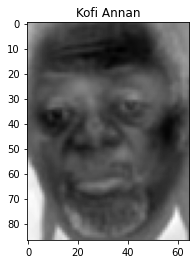

In [23]:
plt.imshow(X_train_3[1014,:].reshape(-1, 65), cmap=cm.gray)
plt.title(people_3.target_names[y_train_3[1014]])

Plots the min image on PC1

Text(0.5, 1.0, 'George Robertson')

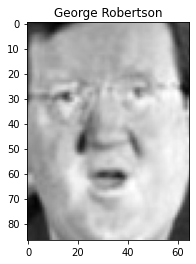

In [24]:
plt.imshow(X_train_3[778,:].reshape(-1, 65), cmap=cm.gray)
plt.title(people_3.target_names[y_train_3[778]])

Plots the max image on PC2

Text(0.5, 1.0, 'Guillermo Coria')

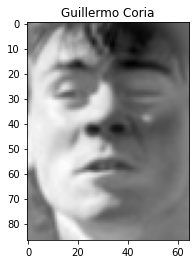

In [25]:
plt.imshow(X_train_3[217,:].reshape(-1, 65), cmap=cm.gray)
plt.title(people_3.target_names[y_train_3[217]])

Plots the min image on PC2

Text(0.5, 1.0, 'George W Bush')

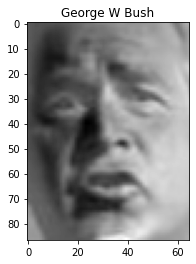

In [26]:
plt.imshow(X_train_3[1533,:].reshape(-1, 65), cmap=cm.gray)
plt.title(people_3.target_names[y_train_3[1533]])

Total variation

In [27]:
eigval_3.sum(axis=0)

5655.0

Variation corresponding to PC1

In [28]:
eigval_3[0].sum(axis=0)/eigval_3.sum(axis=0)

0.26542288

Variation corresponding to PC2

In [29]:
eigval_3[1].sum(axis=0)/eigval_3.sum(axis=0)

0.10972192

Variation corresponding to PC1 and PC2 combined

In [30]:
eigval_3[:2].sum(axis=0)/eigval_3.sum(axis=0)

0.3751448

Visualizes PC1

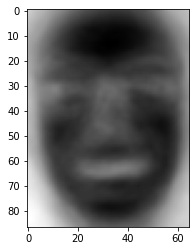

In [31]:
plt.imshow(np.reshape(eigvec_3[:,0], (-1, 65)), cmap=cm.gray)

Projects data on PC1

In [32]:
pc1 = eigvec_3[:,0]
pc1_proj = X_train_3 @ pc1.reshape(-1,1)

In [33]:
pc1_proj.shape

(1547, 1)

Reconstructs data projected on PC1

In [34]:
recon_pc1 = pc1_proj @ pc1.reshape(-1,1).T

Takes the first element and unstandardizes it

In [35]:
recon_pc1_0 = recon_pc1[0]*X_train_std_3+X_train_mean_3

Plots reconstruced X_train[0,:] image on PC1

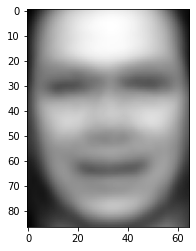

In [36]:
plt.imshow(np.reshape(recon_pc1_0, (-1, 65)), cmap=cm.gray)

Variable storing total variance

In [37]:
total_var = eigval_3.sum(axis=0)

In [38]:
#INITIALIZES SUM AND K TO 0
sum = 0
k=0
#FOR EVERY EIGENVALUE, ADDS IT TO THE SUM WHILE THE SUM ACCOUNTS FOR LESS THAN 95%
for lam in eigval_3:
  sum += lam
  k+=1
  if sum/total_var > 0.95:
    break

Takes the eigenvectors corresponding to the k largest eigenvalues

In [39]:
k

189

In [40]:
pck = eigvec_3[:,:k]

Projects the data

In [41]:
pck_proj = X_train_3 @ pck

Reconstructs the data projected on k principal components

In [42]:
recon_pck = pck_proj @ pck.T

In [43]:
recon_pck_0 = recon_pck[0]*X_train_std_3+X_train_mean_3

Plots reconstruced X_train[0,:] image on k principal components

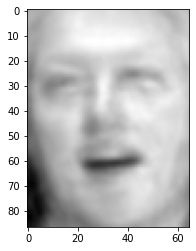

In [44]:
plt.imshow(np.reshape(recon_pck_0, (-1, 65)), cmap=cm.gray)

Plots image resulted if all principal components are used

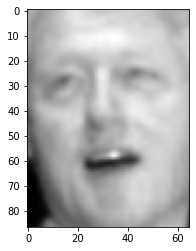

In [45]:
pct_proj = X_train_3 @ eigvec_3
recon_pct = pct_proj @ eigvec_3.T
recon_pct_0 = recon_pct[0]*X_train_std_3+X_train_mean_3
plt.imshow(np.reshape(recon_pct_0, (-1, 65)), cmap=cm.gray)

Plots original image

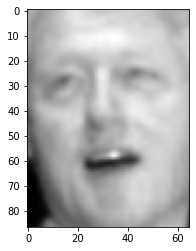

In [46]:
plt.imshow(np.reshape(X_train_3[0]*X_train_std_3+X_train_mean_3, (-1, 65)), cmap=cm.gray)

It appears that we can reconstruct the original image if we use all available principle components